In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from ast import literal_eval
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [2]:
twotup_cols = [    
    'fwd_qt_pkt',
    'fwd_qt_pkt_tcp',
    'fwd_qt_pkt_udp',
    'fwd_qt_pkt_icmp',
    'fwd_qt_pkt_ip',
    'fwd_qt_prtcl',
    'fwd_qt_src_prt',
    'fwd_qt_dst_prt',
    'fwd_qt_fin_fl',
    'fwd_qt_syn_fl',
    'fwd_qt_res_fl',
    'fwd_qt_psh_fl',
    'fwd_qt_ack_fl',
    'fwd_qt_urg_fl',
    'fwd_qt_ecn_fl',
    'fwd_qt_cwr_fl',
    'fwd_avg_hdr_len',
    'fwd_avg_pkt_len',
    'fwd_frq_pkt',
    'fwd_avg_ttl',
    'bck_qt_pkt',
    'bck_qt_pkt_tcp',
    'bck_qt_pkt_udp',
    'bck_qt_pkt_icmp',
    'bck_qt_pkt_ip',
    'bck_qt_prtcl',
    'bck_qt_src_prt',
    'bck_qt_dst_prt',
    'bck_qt_fin_fl',
    'bck_qt_syn_fl',
    'bck_qt_res_fl',
    'bck_qt_psh_fl',
    'bck_qt_ack_fl',
    'bck_qt_urg_fl',
    'bck_qt_ecn_fl',
    'bck_qt_cwr_fl',
    'bck_avg_hdr_len',
    'bck_avg_pkt_len',
    'bck_frq_pkt',
    'bck_avg_ttl',
    'tm_dur_s',
]

In [3]:
len(twotup_cols)

41

In [4]:
fivetup_cols = [
    'fwd_qt_pkt',
    'fwd_qt_fin_fl',
    'fwd_qt_syn_fl',
    'fwd_qt_res_fl',
    'fwd_qt_psh_fl',
    'fwd_qt_ack_fl',
    'fwd_qt_urg_fl',
    'fwd_qt_ecn_fl',
    'fwd_qt_cwr_fl',
    'fwd_avg_hdr_len',
    'fwd_avg_pkt_len',
    'fwd_max_pkt_len',
    'fwd_min_pkt_len',
    'fwd_frq_pkt',
    'fwd_avg_ttl',
    'bck_qt_pkt',
    'bck_qt_fin_fl',
    'bck_qt_syn_fl',
    'bck_qt_res_fl',
    'bck_qt_psh_fl',
    'bck_qt_ack_fl',
    'bck_qt_urg_fl',
    'bck_qt_ecn_fl',
    'bck_qt_cwr_fl',
    'bck_avg_hdr_len',
    'bck_avg_pkt_len',
    'bck_max_pkt_len',
    'bck_min_pkt_len',
    'bck_frq_pkt',
    'bck_avg_ttl',
    'tm_dur_s',
]

In [5]:
len(fivetup_cols)

31

In [6]:
cols = ['flow_key', 'lst_timestamp', 'label'] + \
       ['tt_' + x for x in twotup_cols] + \
       ['ft_' + x for x in fivetup_cols]

In [7]:
len(cols)

75

In [8]:
pd.set_option('display.max_columns', 100)

In [9]:
data = pd.read_csv('../data/interim/flow_features_DrDoS_NTP.csv', sep=';', names=cols)
data['flow_key'] = data.flow_key.apply(lambda x: literal_eval(x))
data['lst_timestamp'] = pd.to_datetime(data.lst_timestamp)
print(data.shape)
data.head()

(1217007, 75)


,flow_key,lst_timestamp,label,tt_fwd_qt_pkt,tt_fwd_qt_pkt_tcp,tt_fwd_qt_pkt_udp,tt_fwd_qt_pkt_icmp,tt_fwd_qt_pkt_ip,tt_fwd_qt_prtcl,tt_fwd_qt_src_prt,tt_fwd_qt_dst_prt,tt_fwd_qt_fin_fl,tt_fwd_qt_syn_fl,tt_fwd_qt_res_fl,tt_fwd_qt_psh_fl,tt_fwd_qt_ack_fl,tt_fwd_qt_urg_fl,tt_fwd_qt_ecn_fl,tt_fwd_qt_cwr_fl,tt_fwd_avg_hdr_len,tt_fwd_avg_pkt_len,tt_fwd_frq_pkt,tt_fwd_avg_ttl,tt_bck_qt_pkt,tt_bck_qt_pkt_tcp,tt_bck_qt_pkt_udp,tt_bck_qt_pkt_icmp,tt_bck_qt_pkt_ip,tt_bck_qt_prtcl,tt_bck_qt_src_prt,tt_bck_qt_dst_prt,tt_bck_qt_fin_fl,tt_bck_qt_syn_fl,tt_bck_qt_res_fl,tt_bck_qt_psh_fl,tt_bck_qt_ack_fl,tt_bck_qt_urg_fl,tt_bck_qt_ecn_fl,tt_bck_qt_cwr_fl,tt_bck_avg_hdr_len,tt_bck_avg_pkt_len,tt_bck_frq_pkt,tt_bck_avg_ttl,tt_tm_dur_s,ft_fwd_qt_pkt,ft_fwd_qt_fin_fl,ft_fwd_qt_syn_fl,ft_fwd_qt_res_fl,ft_fwd_qt_psh_fl,ft_fwd_qt_ack_fl,ft_fwd_qt_urg_fl,ft_fwd_qt_ecn_fl,ft_fwd_qt_cwr_fl,ft_fwd_avg_hdr_len,ft_fwd_avg_pkt_len,ft_fwd_max_pkt_len,ft_fwd_min_pkt_len,ft_fwd_frq_pkt,ft_fwd_avg_ttl,ft_bck_qt_pkt,ft_bck_qt_fin_fl,ft_bck_qt_syn_fl,ft_bck_qt_res_fl,ft_bck_qt_psh_fl,ft_bck_qt_ack_fl,ft_bck_qt_urg_fl,ft_bck_qt_ecn_fl,ft_bck_qt_cwr_fl,ft_bck_avg_hdr_len,ft_bck_avg_pkt_len,ft_bck_max_pkt_len,ft_bck_min_pkt_len,ft_bck_frq_pkt,ft_bck_avg_ttl,ft_tm_dur_s
0,"(65.55.163.78, 443, 192.168.50.7, 50458, 6)",2018-12-01 13:17:12.634572,BENIGN,3,3,0,0,0,1,1,2,0,0,3,0,3,0,0,0,20.0,60.0,3.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0
1,"(65.55.163.78, 443, 192.168.50.7, 50465, 6)",2018-12-01 13:17:13.458373,BENIGN,4,4,0,0,0,1,1,2,0,0,4,0,4,0,0,0,20.0,60.0,4.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0
2,"(172.16.0.5, 60675, 192.168.50.1, 80, 6)",2018-12-01 13:17:16.404686,DrDoS_NTP,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0
3,"(192.168.50.1, 80, 172.16.0.5, 60675, 6)",2018-12-01 13:17:16.404865,DrDoS_NTP,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,5.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,5.0
4,"(172.16.0.5, 60675, 192.168.50.1, 80, 6)",2018-12-01 13:17:16.404963,DrDoS_NTP,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0


In [10]:
data['attack'] = (data.label == 'DrDoS_NTP') * 1

## Train/validation split

In [11]:
data['ip_src'] = data.flow_key.apply(lambda x: x[0])
data['port_src'] = data.flow_key.apply(lambda x: x[1])
data['ip_dst'] = data.flow_key.apply(lambda x: x[2])
data['port_dst'] = data.flow_key.apply(lambda x: x[3])
data['protocol'] = data.flow_key.apply(lambda x: x[4])
data.head()

,flow_key,lst_timestamp,label,tt_fwd_qt_pkt,tt_fwd_qt_pkt_tcp,tt_fwd_qt_pkt_udp,tt_fwd_qt_pkt_icmp,tt_fwd_qt_pkt_ip,tt_fwd_qt_prtcl,tt_fwd_qt_src_prt,tt_fwd_qt_dst_prt,tt_fwd_qt_fin_fl,tt_fwd_qt_syn_fl,tt_fwd_qt_res_fl,tt_fwd_qt_psh_fl,tt_fwd_qt_ack_fl,tt_fwd_qt_urg_fl,tt_fwd_qt_ecn_fl,tt_fwd_qt_cwr_fl,tt_fwd_avg_hdr_len,tt_fwd_avg_pkt_len,tt_fwd_frq_pkt,tt_fwd_avg_ttl,tt_bck_qt_pkt,tt_bck_qt_pkt_tcp,tt_bck_qt_pkt_udp,tt_bck_qt_pkt_icmp,tt_bck_qt_pkt_ip,tt_bck_qt_prtcl,tt_bck_qt_src_prt,tt_bck_qt_dst_prt,tt_bck_qt_fin_fl,tt_bck_qt_syn_fl,tt_bck_qt_res_fl,tt_bck_qt_psh_fl,tt_bck_qt_ack_fl,tt_bck_qt_urg_fl,tt_bck_qt_ecn_fl,tt_bck_qt_cwr_fl,tt_bck_avg_hdr_len,tt_bck_avg_pkt_len,tt_bck_frq_pkt,tt_bck_avg_ttl,tt_tm_dur_s,ft_fwd_qt_pkt,ft_fwd_qt_fin_fl,ft_fwd_qt_syn_fl,ft_fwd_qt_res_fl,ft_fwd_qt_psh_fl,ft_fwd_qt_ack_fl,ft_fwd_qt_urg_fl,ft_fwd_qt_ecn_fl,ft_fwd_qt_cwr_fl,ft_fwd_avg_hdr_len,ft_fwd_avg_pkt_len,ft_fwd_max_pkt_len,ft_fwd_min_pkt_len,ft_fwd_frq_pkt,ft_fwd_avg_ttl,ft_bck_qt_pkt,ft_bck_qt_fin_fl,ft_bck_qt_syn_fl,ft_bck_qt_res_fl,ft_bck_qt_psh_fl,ft_bck_qt_ack_fl,ft_bck_qt_urg_fl,ft_bck_qt_ecn_fl,ft_bck_qt_cwr_fl,ft_bck_avg_hdr_len,ft_bck_avg_pkt_len,ft_bck_max_pkt_len,ft_bck_min_pkt_len,ft_bck_frq_pkt,ft_bck_avg_ttl,ft_tm_dur_s,attack,ip_src,port_src,ip_dst,port_dst,protocol
0,"(65.55.163.78, 443, 192.168.50.7, 50458, 6)",2018-12-01 13:17:12.634572,BENIGN,3,3,0,0,0,1,1,2,0,0,3,0,3,0,0,0,20.0,60.0,3.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0,0,65.55.163.78,443,192.168.50.7,50458,6
1,"(65.55.163.78, 443, 192.168.50.7, 50465, 6)",2018-12-01 13:17:13.458373,BENIGN,4,4,0,0,0,1,1,2,0,0,4,0,4,0,0,0,20.0,60.0,4.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0,0,65.55.163.78,443,192.168.50.7,50465,6
2,"(172.16.0.5, 60675, 192.168.50.1, 80, 6)",2018-12-01 13:17:16.404686,DrDoS_NTP,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0,1,172.16.0.5,60675,192.168.50.1,80,6
3,"(192.168.50.1, 80, 172.16.0.5, 60675, 6)",2018-12-01 13:17:16.404865,DrDoS_NTP,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,5.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,5.0,1,192.168.50.1,80,172.16.0.5,60675,6
4,"(172.16.0.5, 60675, 192.168.50.1, 80, 6)",2018-12-01 13:17:16.404963,DrDoS_NTP,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0,1,172.16.0.5,60675,192.168.50.1,80,6


In [12]:
unique_keys = data.groupby(['ip_src', 'ip_dst']).size().reset_index()
print(unique_keys.shape)
unique_keys.head()

(1118, 3)


,ip_src,ip_dst,0
0,0.0.0.0,255.255.255.255,23
1,104.117.0.160,192.168.50.7,1
2,104.118.6.139,192.168.50.7,1
3,104.18.58.178,192.168.50.7,6
4,104.18.58.178,192.168.50.8,1


In [13]:
unique_keys = data.groupby(['ip_src', 'ip_dst', 'attack']).size().reset_index()
print(unique_keys.shape)
unique_keys.head()

(1118, 4)


,ip_src,ip_dst,attack,0
0,0.0.0.0,255.255.255.255,0,23
1,104.117.0.160,192.168.50.7,0,1
2,104.118.6.139,192.168.50.7,0,1
3,104.18.58.178,192.168.50.7,0,6
4,104.18.58.178,192.168.50.8,0,1


In [14]:
unique_keys[unique_keys.attack == 1]

,ip_src,ip_dst,attack,0
30,172.16.0.5,192.168.50.1,1,1200595
248,192.168.50.1,172.16.0.5,1,2047


### Modelling decision

Normaly I would separate my train and validation between unique keys, since the most important variables are from the 2-tuple dictionary (it can be seen from the Pearson correlation coefficients in the previous notebook). But, there is only one bidirectional attack flow. So I will split my train and validation on time.

In [15]:
data.lst_timestamp.describe()

count                        1217007
unique                       1214353
top       2018-12-01 14:41:50.370151
freq                               2
first     2018-12-01 13:17:12.634572
last      2018-12-01 14:51:39.813446
Name: lst_timestamp, dtype: object

In [16]:
unique_keys[unique_keys.attack == 0][0].sum()

14365

In [17]:
train_test_threshold = datetime(2018, 12, 1, 14, 40, 0)
data_train = data[data.lst_timestamp <= train_test_threshold]
data_valid = data[data.lst_timestamp > train_test_threshold]
print(data_train.shape)
print(data_valid.shape)

(567638, 81)
(649369, 81)


In [18]:
X_train, y_train = data_train.iloc[:, 3:-6], data_train.attack
X_valid, y_valid = data_valid.iloc[:, 3:-6], data_valid.attack

In [19]:
X_train.head()

,tt_fwd_qt_pkt,tt_fwd_qt_pkt_tcp,tt_fwd_qt_pkt_udp,tt_fwd_qt_pkt_icmp,tt_fwd_qt_pkt_ip,tt_fwd_qt_prtcl,tt_fwd_qt_src_prt,tt_fwd_qt_dst_prt,tt_fwd_qt_fin_fl,tt_fwd_qt_syn_fl,tt_fwd_qt_res_fl,tt_fwd_qt_psh_fl,tt_fwd_qt_ack_fl,tt_fwd_qt_urg_fl,tt_fwd_qt_ecn_fl,tt_fwd_qt_cwr_fl,tt_fwd_avg_hdr_len,tt_fwd_avg_pkt_len,tt_fwd_frq_pkt,tt_fwd_avg_ttl,tt_bck_qt_pkt,tt_bck_qt_pkt_tcp,tt_bck_qt_pkt_udp,tt_bck_qt_pkt_icmp,tt_bck_qt_pkt_ip,tt_bck_qt_prtcl,tt_bck_qt_src_prt,tt_bck_qt_dst_prt,tt_bck_qt_fin_fl,tt_bck_qt_syn_fl,tt_bck_qt_res_fl,tt_bck_qt_psh_fl,tt_bck_qt_ack_fl,tt_bck_qt_urg_fl,tt_bck_qt_ecn_fl,tt_bck_qt_cwr_fl,tt_bck_avg_hdr_len,tt_bck_avg_pkt_len,tt_bck_frq_pkt,tt_bck_avg_ttl,tt_tm_dur_s,ft_fwd_qt_pkt,ft_fwd_qt_fin_fl,ft_fwd_qt_syn_fl,ft_fwd_qt_res_fl,ft_fwd_qt_psh_fl,ft_fwd_qt_ack_fl,ft_fwd_qt_urg_fl,ft_fwd_qt_ecn_fl,ft_fwd_qt_cwr_fl,ft_fwd_avg_hdr_len,ft_fwd_avg_pkt_len,ft_fwd_max_pkt_len,ft_fwd_min_pkt_len,ft_fwd_frq_pkt,ft_fwd_avg_ttl,ft_bck_qt_pkt,ft_bck_qt_fin_fl,ft_bck_qt_syn_fl,ft_bck_qt_res_fl,ft_bck_qt_psh_fl,ft_bck_qt_ack_fl,ft_bck_qt_urg_fl,ft_bck_qt_ecn_fl,ft_bck_qt_cwr_fl,ft_bck_avg_hdr_len,ft_bck_avg_pkt_len,ft_bck_max_pkt_len,ft_bck_min_pkt_len,ft_bck_frq_pkt,ft_bck_avg_ttl,ft_tm_dur_s
0,3,3,0,0,0,1,1,2,0,0,3,0,3,0,0,0,20.0,60.0,3.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0
1,4,4,0,0,0,1,1,2,0,0,4,0,4,0,0,0,20.0,60.0,4.0,241.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2,0,0,2,0,2,0,0,0,20.0,60.000000,60,60,2.0,241.0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.0
2,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0
3,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,5.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,5.0
4,26,26,0,0,0,1,3,1,2,6,0,6,20,0,0,0,20.0,171.0,5.2,63.0,20,20,0,0,0,1,1,3,2,6,0,6,20,0,0,0,20.0,390.2,4.0,64.0,5.0,14,2,2,0,4,12,0,0,0,20.0,204.857143,575,66,2.8,63.0,12,2,2,0,4,12,0,0,0,20.0,424.833333,1139,66,2.4,64.0,5.0


In [20]:
y_train.head()

0    0
1    0
2    1
3    1
4    1
Name: attack, dtype: int64

## Training

A simple decision tree with max depth 3.

In [21]:
clf = DecisionTreeClassifier(max_depth=3)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Performance metrics

### ROC AUC

In [23]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_valid_pred = clf.predict_proba(X_valid)[:, 1]

In [24]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_valid = roc_auc_score(y_valid, y_valid_pred)
print(f'ROC AUC Score on train: {auc_train}')
print(f'ROC AUC Score on validation: {auc_valid}')

ROC AUC Score on train: 0.999998903194662
ROC AUC Score on validation: 1.0


### Accuracy

In [25]:
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)

In [26]:
acc_train = accuracy_score(y_train, y_train_pred)
acc_valid = accuracy_score(y_valid, y_valid_pred)
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on validation: {acc_valid}')

Accuracy on train: 0.9999735747078243
Accuracy on validation: 1.0


### Confusion Matrix

Text(0.5, 24.0, 'Predicted')

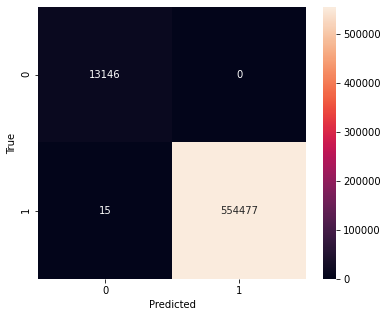

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='')
plt.ylabel('True')
plt.xlabel('Predicted')

Text(0.5, 24.0, 'Predicted')

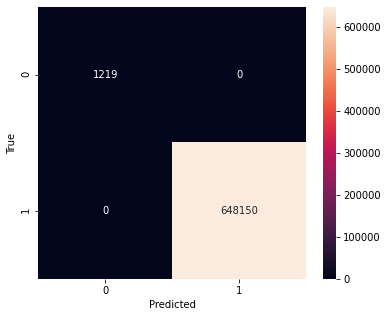

In [30]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_valid, y_valid_pred), annot=True, fmt='')
plt.ylabel('True')
plt.xlabel('Predicted')